## Import libraries

In [146]:
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import numpy as np 
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

## First dataset

In [2]:
tech_areas = pd.read_csv("data/3rd_block/industry_4_0_technological_areas_of_acquisitions.csv")

In [4]:
# Drop useless columns
tech_areas = tech_areas.drop(["ITTER107", "VARICT", "ATECO_2007", "CLLVT", "Select time", "Flag Codes", "Flags"], axis=1)

In [5]:
tech_areas.head(10)

Territory                      Data type  \
0  Nord-ovest        Internet of things area   
1  Nord-ovest               3D printing area   
2  Nord-ovest                   robotic area   
3  Nord-ovest           cloud computing area   
4  Nord-ovest           web application area   
5  Nord-ovest              online sales area   
6  Nord-ovest              social media area   
7  Nord-ovest        Big Data Analytics area   
8  Nord-ovest  augmented and virtual reality   
9  Nord-ovest               IT security area   

                                           NACE 2007  \
0  total economic activities  (c-n, including 951...   
1  total economic activities  (c-n, including 951...   
2  total economic activities  (c-n, including 951...   
3  total economic activities  (c-n, including 951...   
4  total economic activities  (c-n, including 951...   
5  total economic activities  (c-n, including 951...   
6  total economic activities  (c-n, including 951...   
7  total economic activities  (c-n, including 951...   
8  total economic activities  (c-n, including 951...   
9  total economic activities  (c-n, including 951...   

  Size classes of persons employed  TIME  Value  
0                      10 and over  2017  11.04  
1                      10 and over  2017   2.93  
2                      10 and over  2017   4.78  
3                      10 and over  2017  18.24  
4                      10 and over  2017  29.16  
5                      10 and over  2017  10.20  
6                      10 and over  2017  16.30  
7                      10 and over  2017   5.08  
8                      10 and over  2017   1.10  
9                      10 and over  2017  49.46

In [55]:
# Enterprises which had acquired goods/services in technological areas in the previous three years (percentages)
types = ['Internet of things area', '3D printing area', 'robotic area', 'cloud computing area', 'web application area', 'online sales area', 'social media area', 'Big Data Analytics area', 'augmented and virtual reality', 'IT security area']
tech_areas_acquired = tech_areas.loc[tech_areas['Data type'].isin(types)]

# Enterprises indicating the first five technological areas with greater impact on development in the two-year period, by indicated area (percentages)
tech_areas_impact = tech_areas.loc[~tech_areas['Data type'].isin(types)]

# Replace long data types with shorter data types
new_data_types = ['Internet of things', '3D printing', 'robotic', 'cloud computing', 'web application', 'online sales', 'social media', 'Big Data Analytics', 'augmented and virtual reality', 'IT security', 'other areas', 'technological areas not relevant', 'do not know how to respond']

for index, data_type in enumerate(tech_areas_impact['Data type'].unique()):
    tech_areas_impact.loc[tech_areas_impact['Data type'] == data_type, 'Data type'] = new_data_types[index]

### Treemap

In [205]:
tech_areas_acquired["Italy"] = "Italy"
fig = px.treemap(tech_areas_acquired, path=['Italy', 'Territory', 'Data type'], color='Value',
                  color_continuous_scale='viridis', range_color=[0, max(tech_areas_acquired['Value'])],
                  color_continuous_midpoint=np.average(tech_areas_acquired['Value']),
                  width=1000, height=800)
fig.show()

### Plotly barchart

In [8]:
x_data = list(tech_areas_acquired['Data type'].unique())

y_data = []
for territory in tech_areas_acquired['Territory'].unique():
    y_data.append(list(tech_areas_acquired.loc[tech_areas_acquired['Territory'] == territory]['Value']))

fig = go.Figure()

marker_colors = ['indianred', 'lightsalmon', 'rgb(20, 180, 0)', 'rgb(26, 118, 255)']

for index, values in enumerate(y_data):
    fig.add_trace(go.Bar(
        x=x_data,
        y=values,
        name=tech_areas_acquired['Territory'].unique()[index],
        marker_color=marker_colors[index]
    ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, width=800, height=600)
fig.show()

### Seaborn barchart

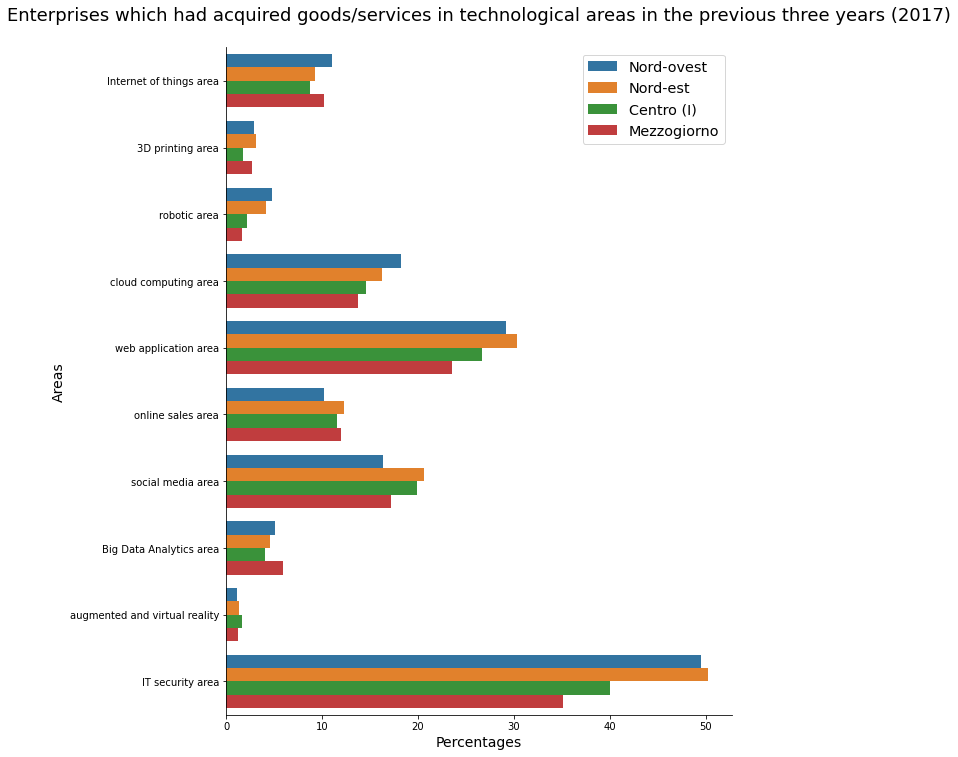

In [59]:
ax = sns.catplot(x='Value', y='Data type', hue='Territory', data=tech_areas_acquired, kind='bar', height=10, aspect=1)
plt.title('Enterprises which had acquired goods/services in technological areas in the previous three years (2017)\n', fontsize=18)
plt.xlabel('Percentages', fontsize=14)
plt.ylabel('Areas', fontsize=14)
ax._legend.remove()
plt.legend(fontsize='x-large', title_fontsize='40')

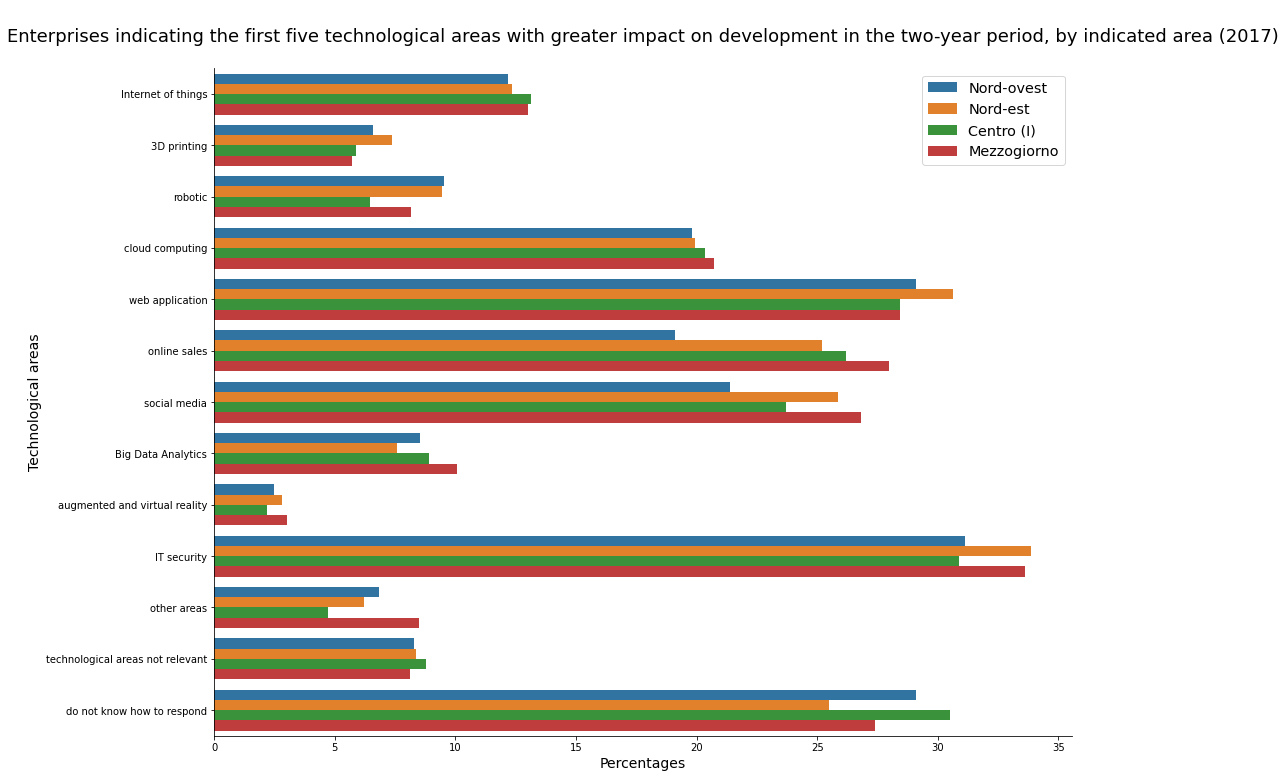

In [61]:
ax = sns.catplot(x='Value', y='Data type', hue='Territory', data=tech_areas_impact, kind='bar', height=10, aspect=1.5)
plt.title('\nEnterprises indicating the first five technological areas with greater impact on development in the two-year period, by indicated area (2017)\n', fontsize=18)
plt.xlabel('Percentages', fontsize=14)
plt.ylabel('Technological areas', fontsize=14)
ax._legend.remove()
plt.legend(fontsize='x-large', title_fontsize='40')

## Second dataset

In [67]:
digitization_factors = pd.read_csv("data/3rd_block/industry_4_0_digitization_factors.csv")

In [68]:
# Drop useless columns
digitization_factors = digitization_factors.drop(["ITTER107", "VARICT", "ATECO_2007", "CLLVT", "Select time", "Flag Codes", "Flags"], axis=1)

# Replace long data types with shorter data types
new_data_types = ['ultra-broadband', 'funding and tax incentives', 'digital initiative of P.A.', 'capacity to make network', 'business digitization strategy', 'other factors', 'any factor', 'do not know how to respond', 'recruitment of new digital skills', 'development of new digital skills\n of employees']

for index, data_type in enumerate(digitization_factors['Data type'].unique()):
    digitization_factors.loc[digitization_factors['Data type'] == data_type, 'Data type'] = new_data_types[index]

In [65]:
digitization_factors.head()

Territory                       Data type  \
0  Nord-ovest                 ultra-broadband   
1  Nord-ovest      funding and tax incentives   
2  Nord-ovest      digital initiative of P.A.   
3  Nord-ovest        capacity to make network   
4  Nord-ovest  business digitization strategy   

                                           NACE 2007  \
0  total economic activities  (c-n, including 951...   
1  total economic activities  (c-n, including 951...   
2  total economic activities  (c-n, including 951...   
3  total economic activities  (c-n, including 951...   
4  total economic activities  (c-n, including 951...   

  Size classes of persons employed  TIME  Value  
0                      10 and over  2018  30.78  
1                      10 and over  2018  47.39  
2                      10 and over  2018  11.49  
3                      10 and over  2018   6.27  
4                      10 and over  2018  16.29

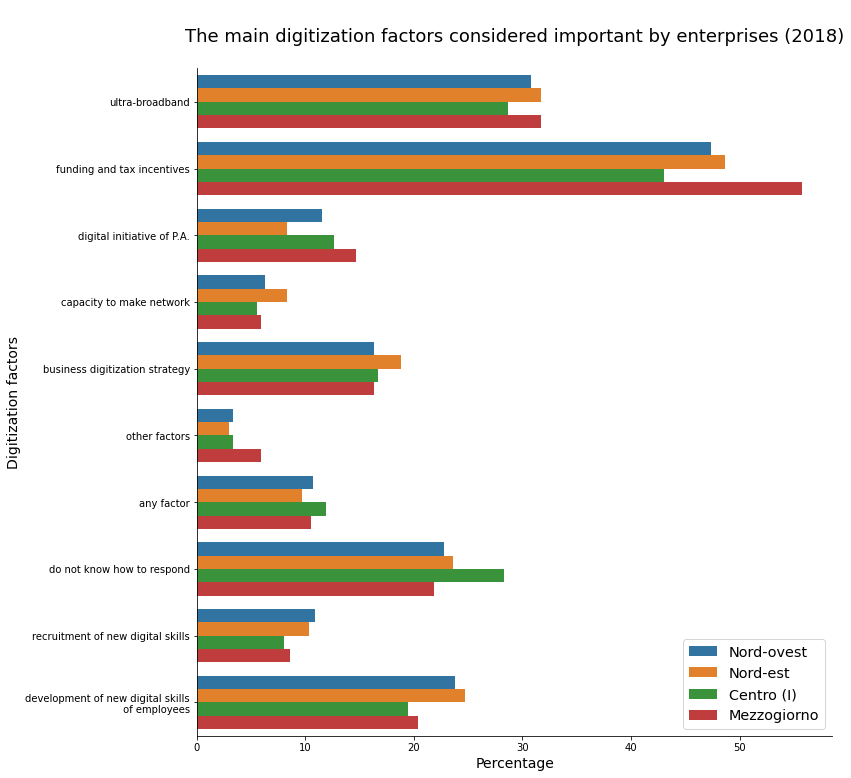

In [70]:
ax = sns.catplot(x='Value', y='Data type', hue='Territory', data=digitization_factors, kind='bar', height=10, aspect=1.2)
plt.title('\nThe main digitization factors considered important by enterprises (2018)\n', fontsize=18)
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Digitization factors', fontsize=14)
ax._legend.remove()
plt.legend(fontsize='x-large', title_fontsize='40')

## TODO 
From the above data, show other interesting aspects, e.g. aggregated data.

## Third dataset

In [220]:
innovation = pd.read_csv("data/3rd_block/innovation_enterprises.csv")
# Remove the rows corresponding to 'Italy' etc. --> We will focus on regions
innovation = innovation.loc[innovation['Territory'] != 'Italy']
innovation = innovation.loc[innovation['Territory'] != 'Nord-ovest']
innovation = innovation.loc[innovation['Territory'] != 'Nord-est']
innovation = innovation.loc[innovation['Territory'] != 'Centro (I)']
innovation = innovation.loc[innovation['Territory'] != 'Mezzogiorno']
innovation = innovation.loc[innovation['Territory'] != 'Isole']

# Drop useless columns
innovation = innovation.drop(["ITTER107", "TIPO_DATO_CIS", "ATECO_2007", "CLLVT", "Select time", "Flag Codes", "Flags"], axis=1)

In [221]:
innovation.head()

Territory                                         Indicators  \
22  Piemonte                                  total enterprises   
23  Piemonte             enterprises with innovation activities   
24  Piemonte  enterprises with innovation activities (percen...   
25  Piemonte  enterprises with product o process innovation ...   
26  Piemonte  enterprises with product o process innovation ...   

                                            NACE 2007  \
22  total industry and services  (b-f, g, h, k, 58...   
23  total industry and services  (b-f, g, h, k, 58...   
24  total industry and services  (b-f, g, h, k, 58...   
25  total industry and services  (b-f, g, h, k, 58...   
26  total industry and services  (b-f, g, h, k, 58...   

   Size classes of persons employed  TIME    Value  
22                      10 and over  2016  11866.0  
23                      10 and over  2016   5999.0  
24                      10 and over  2016     50.6  
25                      10 and over  2016   4846.0  
26                      10 and over  2016     40.8

In [225]:
innovation['Indicators'].unique()

array(['total enterprises', 'enterprises with innovation activities',
       'enterprises with innovation activities (percentage of on total enterprises)',
       'enterprises with product o process innovation activities',
       'enterprises with product o process innovation activities (percentage on total enterprises)',
       'enterprises that have introduced product o process innovations ',
       'enterprises that have introduced product o process innovations by feature of business  (percent)',
       'innovation expenditure  (thousands of euro)',
       'innovation expenditure per number of persons employed',
       'enterprise with product o process innovation activities that had co-operation arrangements on innovation activities',
       'enterprise with product o process innovation activities that had co-operation arrangements on innovation activities (percentage of enterprises with innovative product / process activities)'],
      dtype=object)

In [284]:
# Get only the enterprises with innovation activities (percentage on total) for each region
innovation_percentage = innovation.loc[innovation['Indicators'] == 'enterprises with innovation activities (percentage of on total enterprises)']

# Merge Bolzano, Trento and Sudtirol
sudtirol_perc = float(innovation_percentage.loc[innovation_percentage['Territory'] == 'Trentino Alto Adige / Südtirol']['Value'])
bolzano_perc = float(innovation_percentage.loc[innovation_percentage['Territory'] == 'Provincia Autonoma Bolzano / Bozen']['Value'])
trento_perc = float(innovation_percentage.loc[innovation_percentage['Territory'] == 'Provincia Autonoma Trento']['Value'])
mean_perc = (sudtirol_perc + bolzano_perc + trento_perc) / 3
innovation_percentage.loc[innovation_percentage['Territory'] == 'Trentino Alto Adige / Südtirol', 'Value'] = mean_perc
innovation_percentage.loc[innovation_percentage['Territory'] == 'Trentino Alto Adige / Südtirol', 'Territory'] = 'Trentino Alto Adige'
innovation_percentage = innovation_percentage.loc[~((innovation_percentage['Territory'] == 'Provincia Autonoma Bolzano / Bozen')),:]
innovation_percentage = innovation_percentage.loc[~((innovation_percentage['Territory'] == 'Provincia Autonoma Trento')),:]

innovation_percentage = innovation_percentage.drop(["Indicators", "NACE 2007", "Size classes of persons employed", "TIME"], axis=1)

# Get only the enterprises with the total number of innovation activities for each region
innovation_total = innovation.loc[innovation['Indicators'] == 'enterprises with innovation activities']

# Merge Bolzano, Trento and Sudtirol
sudtirol_tot = float(innovation_total.loc[innovation_total['Territory'] == 'Trentino Alto Adige / Südtirol']['Value'])
bolzano_tot = float(innovation_total.loc[innovation_total['Territory'] == 'Provincia Autonoma Bolzano / Bozen']['Value'])
trento_tot = float(innovation_total.loc[innovation_total['Territory'] == 'Provincia Autonoma Trento']['Value'])
total_number = sudtirol_tot + bolzano_tot + trento_tot
innovation_total.loc[innovation_total['Territory'] == 'Trentino Alto Adige / Südtirol', 'Value'] = total_number
innovation_total.loc[innovation_total['Territory'] == 'Trentino Alto Adige / Südtirol', 'Territory'] = 'Trentino Alto Adige'
innovation_total = innovation_total.loc[~((innovation_total['Territory'] == 'Provincia Autonoma Bolzano / Bozen')),:]
innovation_total = innovation_total.loc[~((innovation_total['Territory'] == 'Provincia Autonoma Trento')),:]

innovation_total = innovation_total.drop(["Indicators", "NACE 2007", "Size classes of persons employed", "TIME"], axis=1)


In [285]:
innovation_total.head(10)

Territory    Value
23                         Piemonte   5999.0
34   Valle d'Aosta / Vallée d'Aoste     79.0
45                          Liguria   1542.0
56                        Lombardia  20535.0
78              Trentino Alto Adige   3380.0
111                          Veneto   9939.0
122           Friuli-Venezia Giulia   1829.0
133                  Emilia-Romagna   8663.0
155                         Toscana   5330.0
166                          Umbria   1146.0

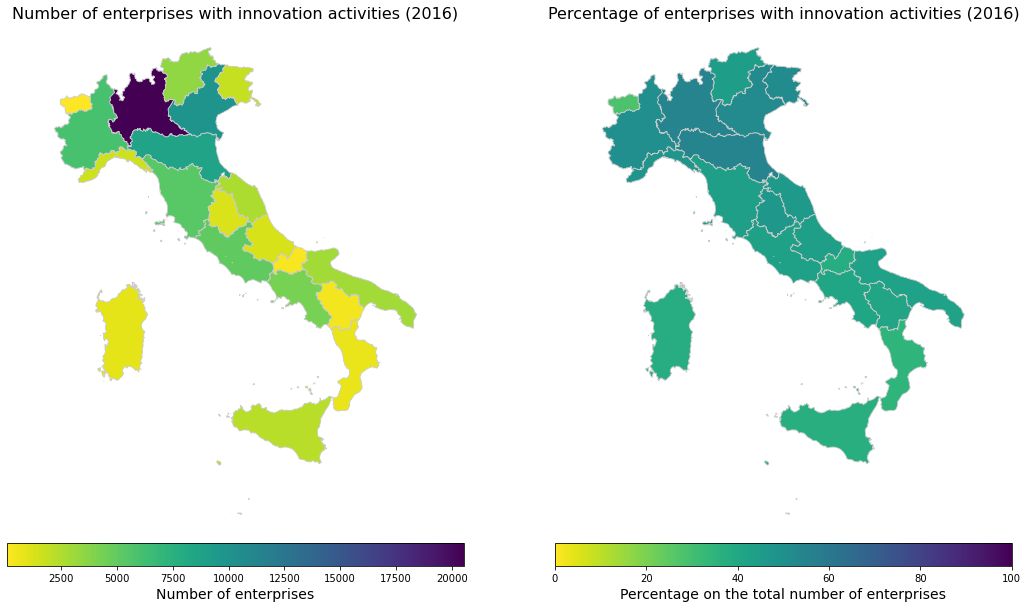

In [291]:
map_reg = gpd.read_file(os.path.join('assets', 'maps', 'Reg01012019_g', 'Reg01012019_g_WGS84.shp'))
map_reg['DEN_REG'] = map_reg['DEN_REG'].replace({'Friuli Venezia Giulia': 'Friuli-Venezia Giulia', 'Trentino-Alto Adige': 'Trentino Alto Adige', "Valle d'Aosta": "Valle d'Aosta / Vallée d'Aoste"})
# Merge the map with the pandas df
merged_perc = pd.merge(map_reg, innovation_percentage, left_on='DEN_REG', right_on='Territory', how='left')
merged_total = pd.merge(map_reg, innovation_total, left_on='DEN_REG', right_on='Territory', how='left')
fig, ax = plt.subplots(ncols=2, figsize=(18, 10))

# FIRST GRAPH: "Number of enterprises with innovation activities"
ax[0].axis('off')
ax[0].set_title('Number of enterprises with innovation activities (2016)', fontsize=16)
merged_total.plot(column='Value', vmin = 0, vmax = max(innovation_total['Value']), cmap='viridis_r', linewidth=0.8, ax=ax[0], edgecolor='0.8', legend=False)

# SECOND GRAPH: "Percentage of enterprises with innovation activities"
ax[1].axis('off')
ax[1].set_title('Percentage of enterprises with innovation activities (2016)', fontsize=16)
merged_perc.plot(column='Value', vmin = 0, vmax = 100, cmap='viridis_r', linewidth=0.8, ax=ax[1], edgecolor='0.8', legend=False)

# Create the first colorbar
norm = colors.Normalize(vmin=min(innovation_total['Value']), vmax=max(innovation_total['Value']))
cbar = plt.cm.ScalarMappable(norm=norm, cmap='viridis_r')
# Add colorbar
ax_cbar = fig.colorbar(cbar, ax=ax[0], orientation="horizontal", fraction=0.046, pad=0.01)
# Add label for the colorbar
ax_cbar.set_label('Number of enterprises', fontsize=14)

# Create the second colorbar
norm = colors.Normalize(vmin=0, vmax=100)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='viridis_r')
# Add colorbar
ax_cbar = fig.colorbar(cbar, ax=ax[1], orientation="horizontal", fraction=0.046, pad=0.01)
# Add label for the colorbar
ax_cbar.set_label('Percentage on the total number of enterprises', fontsize=14)

In [228]:
# Get only the innovation expenditure (thousands of euro)
innovation_expenditure = innovation.loc[innovation['Indicators'] == 'innovation expenditure  (thousands of euro)']

# Merge Bolzano, Trento and Sudtirol
sudtirol_exp = float(innovation_expenditure.loc[innovation_expenditure['Territory'] == 'Trentino Alto Adige / Südtirol']['Value'])
bolzano_exp = float(innovation_expenditure.loc[innovation_expenditure['Territory'] == 'Provincia Autonoma Bolzano / Bozen']['Value'])
trento_exp = float(innovation_expenditure.loc[innovation_expenditure['Territory'] == 'Provincia Autonoma Trento']['Value'])
total_exp = sudtirol_exp + bolzano_exp + trento_exp
innovation_expenditure.loc[innovation_expenditure['Territory'] == 'Trentino Alto Adige / Südtirol', 'Value'] = total_exp
innovation_expenditure.loc[innovation_expenditure['Territory'] == 'Trentino Alto Adige / Südtirol', 'Territory'] = 'Trentino Alto Adige'
innovation_expenditure = innovation_expenditure.loc[~((innovation_expenditure['Territory'] == 'Provincia Autonoma Bolzano / Bozen')),:]
innovation_expenditure = innovation_expenditure.loc[~((innovation_expenditure['Territory'] == 'Provincia Autonoma Trento')),:]

innovation_expenditure = innovation_expenditure.drop(["Indicators", "NACE 2007", "Size classes of persons employed", "TIME"], axis=1)

In [229]:
innovation_expenditure.head()

Territory      Value
29                        Piemonte  3855089.0
40  Valle d'Aosta / Vallée d'Aoste    15124.0
51                         Liguria   460880.0
62                       Lombardia  7927645.0
84             Trentino Alto Adige   919414.0

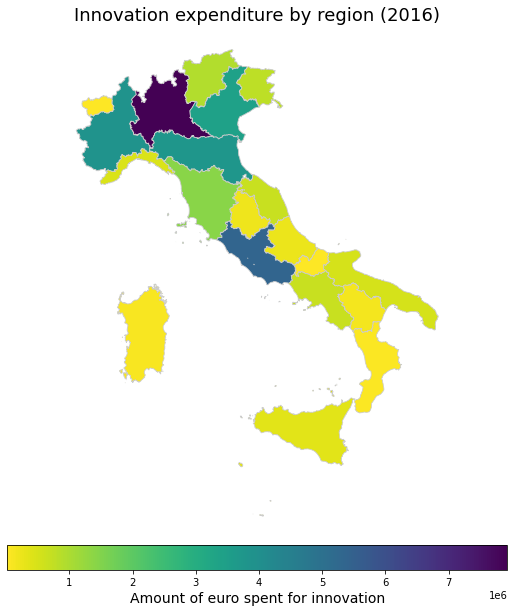

In [280]:
map_reg = gpd.read_file(os.path.join('assets', 'maps', 'Reg01012019_g', 'Reg01012019_g_WGS84.shp'))
map_reg['DEN_REG'] = map_reg['DEN_REG'].replace({'Friuli Venezia Giulia': 'Friuli-Venezia Giulia', 'Trentino-Alto Adige': 'Trentino Alto Adige', "Valle d'Aosta": "Valle d'Aosta / Vallée d'Aoste"})
# Merge the map with the pandas df
merged = pd.merge(map_reg, innovation_expenditure, left_on='DEN_REG', right_on='Territory', how='left')
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.axis('off')
ax.set_title('Innovation expenditure by region (2016)', fontsize=18)
merged.plot(column='Value', vmin = min(innovation_expenditure['Value']), vmax = max(innovation_expenditure['Value']), cmap='viridis_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

# Create the colorbar
norm = colors.Normalize(vmin=min(innovation_expenditure['Value']), vmax=max(innovation_expenditure['Value']))
cbar = plt.cm.ScalarMappable(norm=norm, cmap='viridis_r')
# Add colorbar
ax_cbar = fig.colorbar(cbar, ax=ax, orientation="horizontal", fraction=0.046, pad=0.01)
# Add label for the colorbar
ax_cbar.set_label('Amount of euro spent for innovation', fontsize=14)

## Fourth dataset

### TODO...